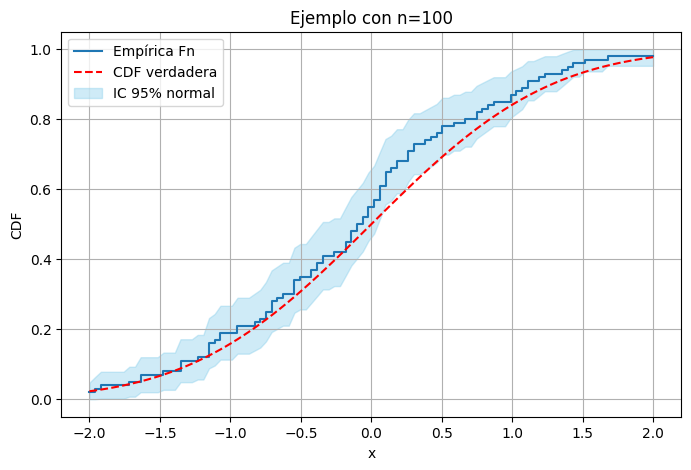

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

n = 100
alpha = 0.05
confianza = 1 - alpha
grid = np.linspace(-2, 2, 100)

# Evaluar la CDF verdadera de N(0,1) sobre la grilla existente grid
F_true = stats.norm.cdf(grid, loc=0, scale=1)

z_crit = stats.norm.ppf(1 - alpha / 2)

def empirical_cdf(sample, grid):
    ecdf = stats.ecdf(sample)
    return ecdf.cdf.evaluate(grid)


sample = stats.norm.rvs(loc=0, scale=1, size=n)

Fn = empirical_cdf(sample, grid)
F_true = stats.norm.cdf(grid)

# IC normal para proporción
se = np.sqrt(Fn * (1 - Fn) / n)
lower = np.clip(Fn - 1.96 * se, 0, 1)
upper = np.clip(Fn + 1.96 * se, 0, 1)

plt.figure(figsize=(8,5))
plt.step(grid, Fn, where="post", label="Empírica Fn")
plt.plot(grid, F_true, "red", linestyle="--", label="CDF verdadera")
plt.fill_between(grid, lower, upper, color="skyblue", alpha=0.4, label="IC 95% normal")
plt.legend()
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("Ejemplo con n=100")
plt.grid(True)
plt.show()

In [27]:
reps = 1000
count_contains = 0
for i in range(reps):
    sample = np.random.normal(0, 1, n)
    Fn = empirical_cdf(sample, grid)
    
    se = np.sqrt(Fn * (1 - Fn) / n)
    lower = np.clip(Fn - z_crit * se, 0, 1)
    upper = np.clip(Fn + z_crit * se, 0, 1)
    
    if np.all((F_true >= lower) & (F_true <= upper)):
        count_contains += 1
print(f"El intervalo de confianza contiene la verdadera CDF en {count_contains} de {reps} repeticiones.")

El intervalo de confianza contiene la verdadera CDF en 0 de 1000 repeticiones.


# Desarrollo

Primero, genero las 100 observaciones de la distribución normal N(0,1)

In [10]:
from scipy import stats

normal = stats.norm(loc=0, scale=1)

obs = normal.rvs(size=100)

alpha = 0.05

Defino funcion para calcular el intervalo de confianza para F

In [2]:
import numpy as np

def calcular_ic_F(ecdf, alpha=0.05):

    # Listas vacias para los limites inferior y superior
    ic_inf = []
    ic_sup = []

    # Calculo el n

    n = len(ecdf.probabilities)

    # Calculo el epsilon_n
    epsilon_n = np.sqrt(np.log(2/alpha) / (2*n))

    # Calculo los limites inferior y superior para cada punto de la ecdf
    for i in range(0,n):
        ic_inf_i = max(0, ecdf.probabilities[i] - epsilon_n)
        ic_sup_i = min(1, ecdf.probabilities[i] + epsilon_n)

        ic_inf.append(ic_inf_i)
        ic_sup.append(ic_sup_i)
    
    return ic_inf, ic_sup

#Calculo F Empírica
F_empirica = stats.ecdf(obs)
#Calculo IC 95% para F
ic_inf, ic_sup = calcular_ic_F(F_empirica.cdf)

Visualizo

<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
C:\Users\rebe_\AppData\Local\Temp\ipykernel_6980\3219877766.py:7: SyntaxWarning: invalid escape sequence '\h'
  F_empirica.cdf.plot(ax=ax, label='F Empírica $\hat{F_n}(x)$', drawstyle="steps-post")


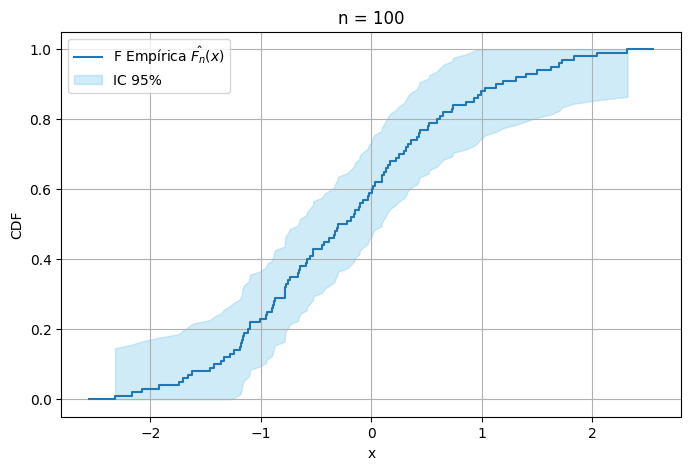

In [5]:
import matplotlib.pyplot as plt

# Genero grafico del intervalo de confianza
fig,ax = plt.subplots(figsize=(8,5))

# Grafico la F empírica
F_empirica.cdf.plot(ax=ax, label='F Empírica $\hat{F_n}(x)$', drawstyle="steps-post")

# Grafico el IC

ax.fill_between(F_empirica.cdf.quantiles, ic_inf, ic_sup, color="skyblue", alpha=0.4, label="IC 95%")


plt.legend()
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("n = 100")
plt.grid(True)
plt.show()

Ahora repito 1000 veces este experimiento y cuento cuantas veces estuvo la verdadera $F(x)$ dentro del intervalo de confianza

In [ ]:
def exp_ic (iteraciones, alpha):

    # Inicializo contador de veces que el IC contiene la verdadera F
    contador = 0

    for i in range(iteraciones):

        # Genero 100 observaciones de N(0,1)
        obs = normal.rvs(size=100)

        # ECDF de F
        F_Empirica = stats.ecdf(obs)

        # CDF F Verdadera
        F_verdadera = stats.norm.cdf(F_Empirica.cdf.quantiles)

        I, S = calcular_ic_F(F_Empirica.cdf, alpha)

        if np.all((F_verdadera >= I) & (F_verdadera <= S)):
            contador += 1

    return contador

# Realizo el experimento
print(f"El intervalo de confianza contiene la verdadera CDF en {exp_ic(1000, alpha)} de 1000 repeticiones.")

El intervalo de confianza contiene la verdadera CDF en 958 de 1000 repeticiones.
